In [33]:
#importing libraries
import pandas as pd

import matplotlib.pyplot as plt

import nltk
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.tokenize.toktok import ToktokTokenizer
from bs4 import BeautifulSoup
import re


In [8]:
#reading the dataset
data = pd.DataFrame(pd.read_excel("Mountain Analytics IMDB Dataset 1.xlsx"))

In [9]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [10]:
#general eda
data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [11]:
data.isnull().sum()

review       0
sentiment    0
dtype: int64

In [18]:
#checking number of positive and negative reviews
data['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

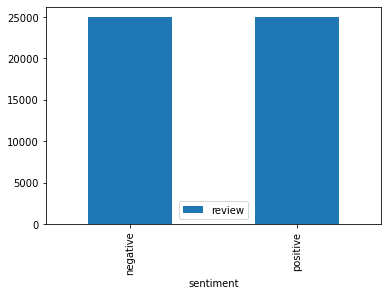

In [12]:
#plotbar
data.groupby('sentiment').count().plot(kind='bar')

In [16]:
#Tokenization of text
tokenizer=ToktokTokenizer()
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

In [24]:
clean_data = data

In [25]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text

#Apply function on review column
clean_data['review']=data['review'].apply(denoise_text)

In [26]:
clean_data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. The filming tec...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [27]:
#Stemming the text
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
#Apply function on review column
clean_data['review']=clean_data['review'].apply(simple_stemmer)

In [28]:
clean_data.head()

,review,sentiment
0,one of the other review ha mention that after ...,positive
1,A wonder littl production. the film techniqu i...,positive
2,I thought thi wa a wonder way to spend time on...,positive
3,basic there' a famili where a littl boy (jake)...,negative
4,"petter mattei' ""love in the time of money"" is ...",positive


In [29]:
#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text
#Apply function on review column
clean_data['review']=clean_data['review'].apply(remove_stopwords)

In [30]:
clean_data.head()

,review,sentiment
0,one review ha mention watch 1 Oz episod ' hook...,positive
1,wonder littl production. film techniqu veri un...,positive
2,thought thi wa wonder way spend time hot summe...,positive
3,basic ' famili littl boy ( jake ) think ' zomb...,negative
4,"petter mattei ' "" love time money "" visual stu...",positive


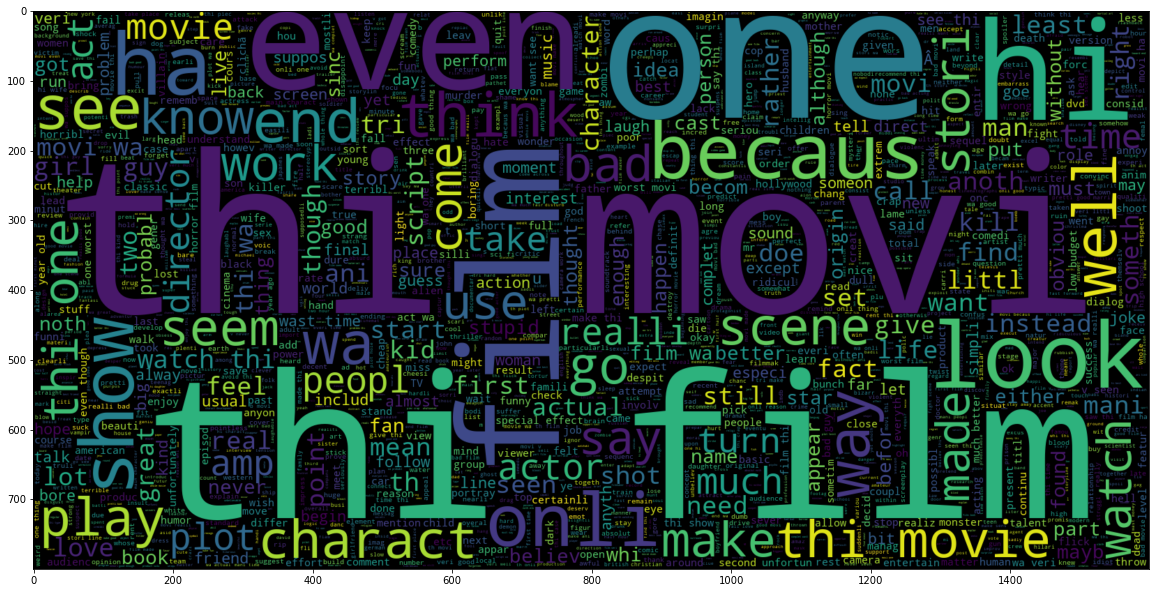

In [34]:
#word cloud for negative reviews
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(clean_data[clean_data.sentiment == "negative"].review))
plt.imshow(wc , interpolation = 'bilinear')

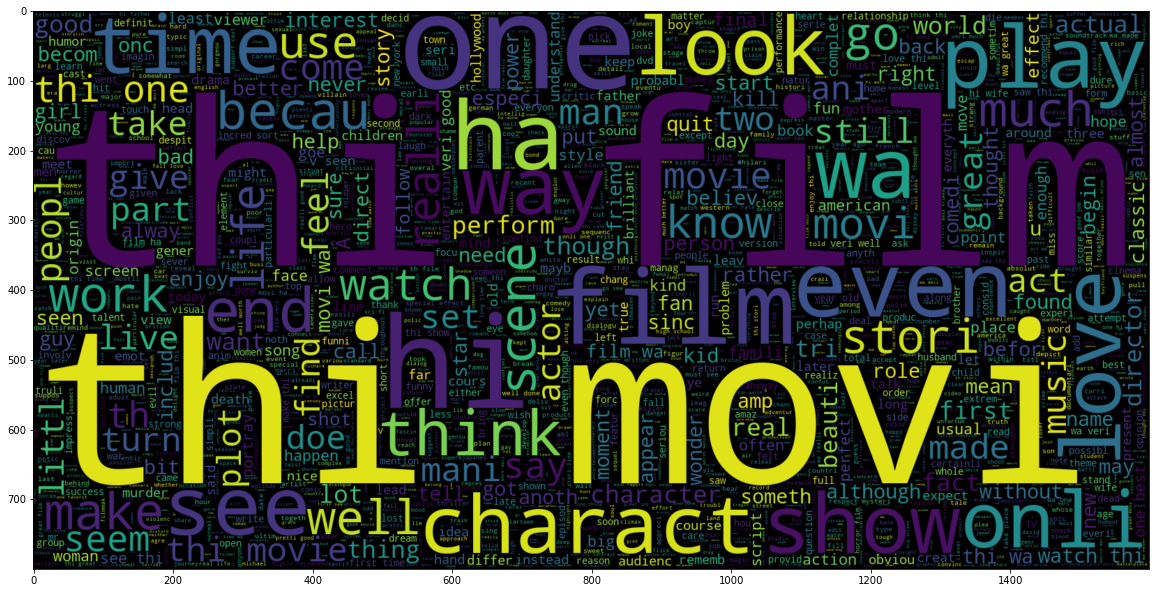

In [35]:
#word cloud for positive reviews
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(clean_data[clean_data.sentiment == "positive"].review))
plt.imshow(wc , interpolation = 'bilinear')